In [79]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [80]:
mean_01=np.array([1,1])
cov_01=np.array([[1,0.1],[0.1,1.2]])

mean_02=np.array([5,5])
cov_02=np.array([[1,0.1],[0.1,1.2]])

dist_01=np.random.multivariate_normal(mean_01,cov_01,200)

dist_02=np.random.multivariate_normal(mean_02,cov_02,200)
print(dist_01.shape)
print(np.cov(dist_01.T))

(200, 2)
[[ 1.1313628   0.09339119]
 [ 0.09339119  1.3010641 ]]


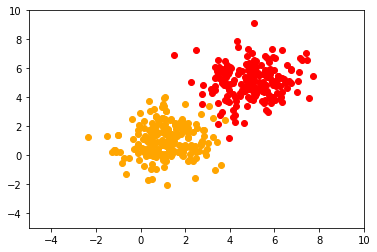

In [81]:
plt.figure(0)
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.scatter(dist_01[:,0],dist_01[:,1],color='orange')
plt.scatter(dist_02[:,0],dist_02[:,1],color='red')
plt.show()

In [82]:
data=np.concatenate((dist_01,dist_02))
print(data.shape)

(400, 2)


In [83]:
k=2
clusters={}

for ix in range(k):
    center={
        'cord':np.random.uniform(data.min(), data.max(), (data.shape[1],)),
        'points':[],
        'hist':[]
    }
    clusters[ix]=center
print(clusters)    

{0: {'hist': [], 'points': [], 'cord': array([ 8.34815951,  5.68347749])}, 1: {'hist': [], 'points': [], 'cord': array([ 4.24427127,  1.91849294])}}


In [84]:
def distance(x1, x2):
    return np.sqrt(((x1-x2)**2).sum())

In [85]:
col=['red','blue','orange','cyan','black']

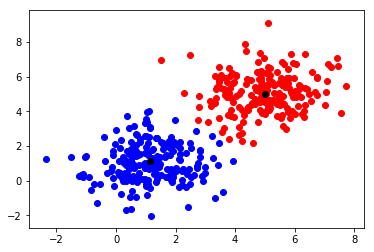

In [93]:
plt.figure(0)
for ix in range(data.shape[0]):
    d=[]
    for cx in range(k):
        # Compute and append distances
        d.append(distance(data[ix],clusters[cx]['cord']))
    # Get the min distance cluster    
    c_id=np.argmin(d)
    # Append point to cluster
    clusters[c_id]['points'].append(data[ix])
    #to visualize data point
    plt.scatter(data[ix,0],data[ix,1],color=col[c_id])
    
# Visualize cluster centers    
for cx in range(k):
    plt.scatter(clusters[cx]['cord'][0],clusters[cx]['cord'][0],color='black')
    
# Update cluster centers    
for cx in range(k):
    # Update history
    clusters[cx]['hist'].append(clusters[cx]['cord'])
    # Reinitialize cluster center with mean
    if len(clusters[cx]['points']) is not 0:
        clusters[cx]['cord']=(np.asarray(clusters[cx]['points']).mean(axis=0))
    # Empty points in cluster    
    clusters[cx]['points']=[]

plt.show()

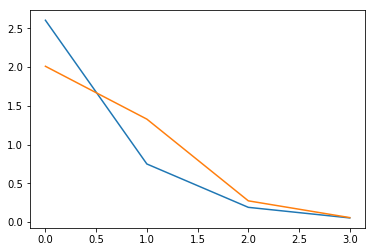

In [94]:
plt.figure(0)
for cx in range(k):
    d=[]
    for pt in range(1,len(clusters[cx]['hist'])):
        d.append(distance(clusters[cx]['hist'][pt],clusters[cx]['hist'][pt-1]))
    plt.plot(d)
plt.show()    

# To compare with scikit learn inbuilt KMeans

In [88]:
from sklearn.cluster import KMeans

In [89]:
data=np.asarray(data)
km=KMeans(n_clusters=2,random_state=0,max_iter=5).fit(data)
print(km.cluster_centers_)

[[ 1.13423277  1.05213802]
 [ 4.983648    5.09157532]]
